In [ ]:
pip install torchvision torchaudio pillow matplotlib requests


In [ ]:
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.3/231.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.1/344.1 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0


In [ ]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

**Part 2: AI-Powered Visual Search (35%)**

In [ ]:
# Load the pre-trained CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [ ]:
import requests
import zipfile
import os

# Function to download a file from a URL
def download_file(url, save_path):
    print(f"Downloading {url}...")
    response = requests.get(url, stream=True)
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    print(f"Saved: {save_path}")

# Define the URLs for the COCO dataset
val2017_url = "http://images.cocodataset.org/zips/val2017.zip"
annotations_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

# Define download paths
download_dir = "./coco_dataset"
os.makedirs(download_dir, exist_ok=True)

val2017_path = os.path.join(download_dir, "val2017.zip")
annotations_path = os.path.join(download_dir, "annotations_trainval2017.zip")

# Download the files
download_file(val2017_url, val2017_path)
download_file(annotations_url, annotations_path)

# Extract the ZIP files
def extract_zip(zip_path, extract_to):
    print(f"Extracting {zip_path}...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted to: {extract_to}")

extract_to_dir = os.path.join(download_dir, "extracted")
os.makedirs(extract_to_dir, exist_ok=True)

extract_zip(val2017_path, extract_to_dir)
extract_zip(annotations_path, extract_to_dir)

print("Dataset downloaded and extracted successfully!")


Saved: ./coco_dataset/val2017.zip
Saved: ./coco_dataset/annotations_trainval2017.zip
Extracting ./coco_dataset/val2017.zip...
Extracted to: ./coco_dataset/extracted
Extracting ./coco_dataset/annotations_trainval2017.zip...
Extracted to: ./coco_dataset/extracted
Dataset downloaded and extracted successfully!


In [ ]:
image_dir = "./coco_dataset/extracted/val2017"  # Update with your extracted directory
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(".jpg")]

In [ ]:
def preprocess_images(image_paths, processor, model, device):
    images = [Image.open(img_path).convert("RGB") for img_path in image_paths]
    inputs = processor(images=images, return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)
    return image_features, images

In [ ]:
# Encode the images
image_features, processed_images = preprocess_images(image_paths, processor, model, device)

In [ ]:
# Define your text query
text_query = "a person riding a horse"

# Encode the text query
text_inputs = processor(text=[text_query], return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    text_features = model.get_text_features(**text_inputs)

# Normalize the text features
text_features = text_features / text_features.norm(dim=1, keepdim=True)

# Normalize the image features
image_features = image_features / image_features.norm(dim=1, keepdim=True)

# Compute similarity scores
similarity_scores = torch.matmul(text_features, image_features.T)


In [ ]:
# Get the indices of the top 5 most similar images
top_k = 5
top_k_indices = similarity_scores[0].topk(top_k).indices

# Retrieve the corresponding image paths and similarity scores
top_k_images = [image_paths[idx] for idx in top_k_indices]
top_k_scores = [similarity_scores[0][idx].item() for idx in top_k_indices]

# Print the results
for img_path, score in zip(top_k_images, top_k_scores):
    print(f"Image: {img_path}, Similarity Score: {score}")


Image: ./coco_dataset/extracted/val2017/000000079229.jpg, Similarity Score: 0.3208293318748474
Image: ./coco_dataset/extracted/val2017/000000439715.jpg, Similarity Score: 0.315519779920578
Image: ./coco_dataset/extracted/val2017/000000574297.jpg, Similarity Score: 0.31225836277008057
Image: ./coco_dataset/extracted/val2017/000000275392.jpg, Similarity Score: 0.3107728064060211
Image: ./coco_dataset/extracted/val2017/000000454798.jpg, Similarity Score: 0.30741453170776367


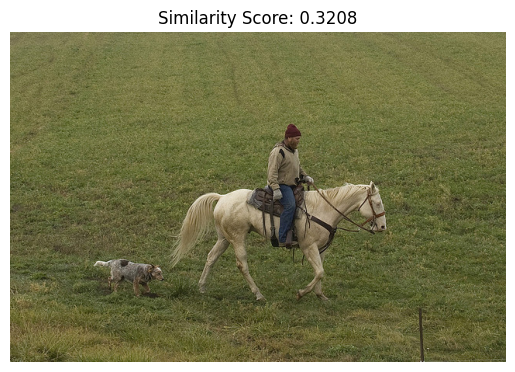

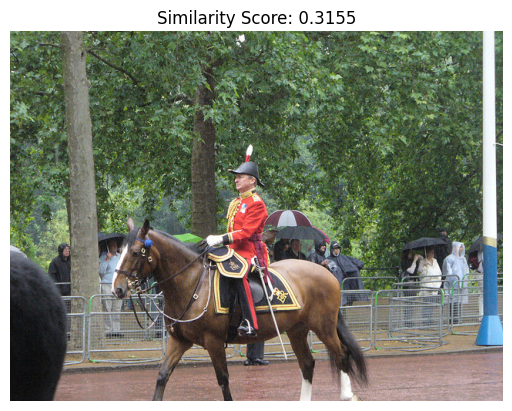

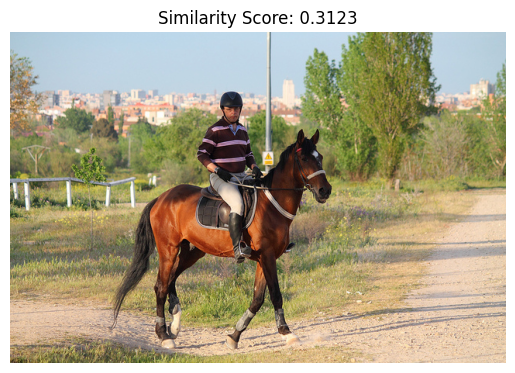

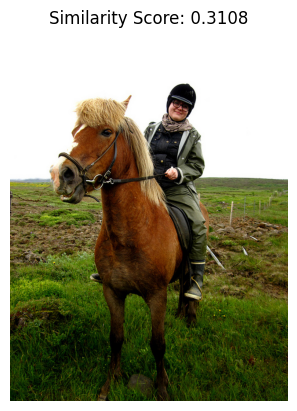

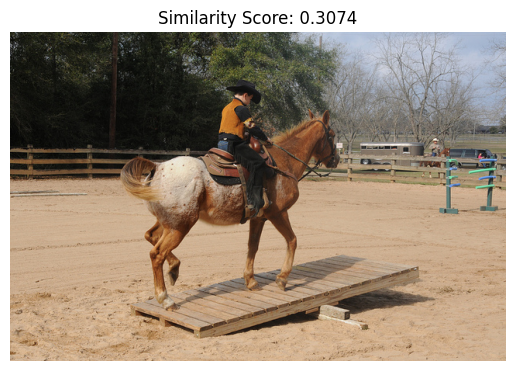

In [ ]:
import matplotlib.pyplot as plt

# Visualize the top 5 images along with their similarity scores
for img_path, score in zip(top_k_images, top_k_scores):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Similarity Score: {score:.4f}")
    plt.axis("off")
    plt.show()
